In [3]:
import requests
# get data
r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")
r1=requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")

In [4]:
from io import BytesIO
import numpy as np
from sklearn.datasets import load_svmlight_file
# load the data and preprocess them
data=load_svmlight_file(BytesIO(r1.content))
x_train,y_train=data[0].todense(),data[1].reshape(len(data[1]),-1)
data=load_svmlight_file(BytesIO(r.content))
x_valid,y_valid=data[0].todense(),data[1].reshape(len(data[1]),-1)
n, m= np.shape(x_train)
p, _ = np.shape(x_valid)
x_valid=np.column_stack((x_valid,np.zeros(p)))


In [5]:
# define some vital parameters
epochs=600
batch_size=256
# initialize some parameters
grad_w = np.zeros((m,1))
grad_b=0
mom = np.zeros((m, 1))
w = np.random.rand(m+1, 1)
b = w[0][0]
w=w[1:m+1]

In [6]:
def sign(x):
    if x>0:
        return 1
    elif x<0:
        return -1
    else:
        return 0

In [7]:
# define other parameters
lamb=0.1
alpha=0.1
beta1=0.9
beta2=0.999
eps=1e-8

In [8]:
# define and initialize 
epoch_set=[]
l_adam=[]
acc_adam=[]
grad_w = np.zeros((m, 1))
w = np.random.rand(m+1, 1)
b = w[0][0]
w=w[1:m+1]
mom = np.zeros((m, 1))
s = np.zeros((m, 1))
mom_b=0
sb=0

In [9]:
import math
import random
for ep in range(epochs+1):
    # training and optimize
    batch_st=random.randint(0,n-batch_size-1)
    for j in range(batch_st,batch_st+batch_size):
        theta=1-y_train[j]*(x_train[j]*w+b)
        if theta < 0:
            grad_w += w
            grad_b += 0
        else:
            grad_w += w-lamb*(y_train[j]*x_train[j]).T
            grad_b += -lamb*y_train[j]
    grad_w=grad_w/batch_size
    grad_b=grad_b/batch_size
    mom=beta1*mom+(1-beta1)*grad_w
    s=beta2*s+np.multiply((1-beta2)*grad_w,grad_w)
    mom_b=beta1*mom_b+(1-beta1)*grad_b
    sb=beta2*sb+(1-beta2)*grad_b*grad_b
    w = w - alpha*mom/(np.sqrt(s)+eps)
    b = b - alpha*mom_b/(math.sqrt(sb)+eps)

    if ep%10==0:
        epoch_set.append(ep)
        hinge_loss=0.0
        res=0
        for i in range(p):
            tmp = np.asarray(1.0 - y_valid[i] * (x_valid[i] *w+b))
            theta = max(tmp[0][0], 0)
            hinge_loss+=theta
            if sign(x_valid[i]*w+b)==y_valid[i]:
                res+=1
        loss=np.sum(np.square(w))/2+lamb*hinge_loss/p
        l_adam.append(loss)
        acc_adam.append(res/p)

No handles with labels found to put in legend.


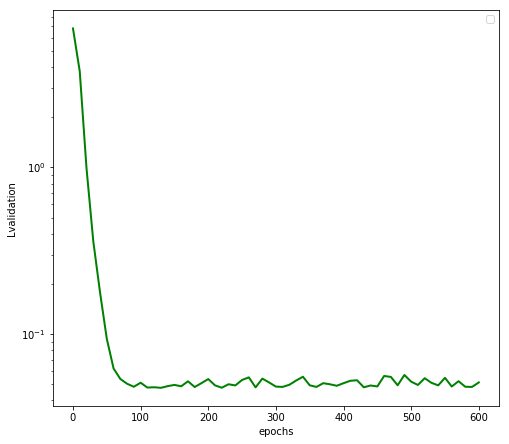

In [13]:
# output the result
import matplotlib.pyplot as plt
plt.figure(figsize=(8,16))
plt.subplot(211)
plt.xlabel('epochs')
plt.ylabel('Lvalidation')
plt.plot(epoch_set,l_adam,color='g',linewidth=2,linestyle='-')
plt.yscale('log')
plt.legend()
